## How to Train YOLOv8 Object Detection on a Custom Dataset

In [ ]:
!nvidia-smi

Thu Dec 21 07:59:51 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

## Install YOLOv8

In [1]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\admin\AppData\Local\Programs\Python\Python311\Scripts\yolo.exe\__main__.py", line 7, in <module>
  File "c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\ultralytics\cfg\__init__.py", line 392, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from 'c:\\Users\\admin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\ultralytics\\utils\\checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of (

## Train YOLOv8 Model on Custom Dataset

In [3]:
# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nem4y7IagBKhlPKqH0yb", model_format="yolov8", notebook="ultralytics")
# set up environment
os.environ["DATASET_DIRECTORY"] = ""
project = rf.workspace("trng-tp").project("vietnamtrafficsign-6cul5")
dataset = project.version(5).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.209, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to VietnamTrafficSign-5 in yolov8:: 100%|██████████| 17342/17342 [00:33<00:00, 511.40it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/VietnamTrafficSign-5/data.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

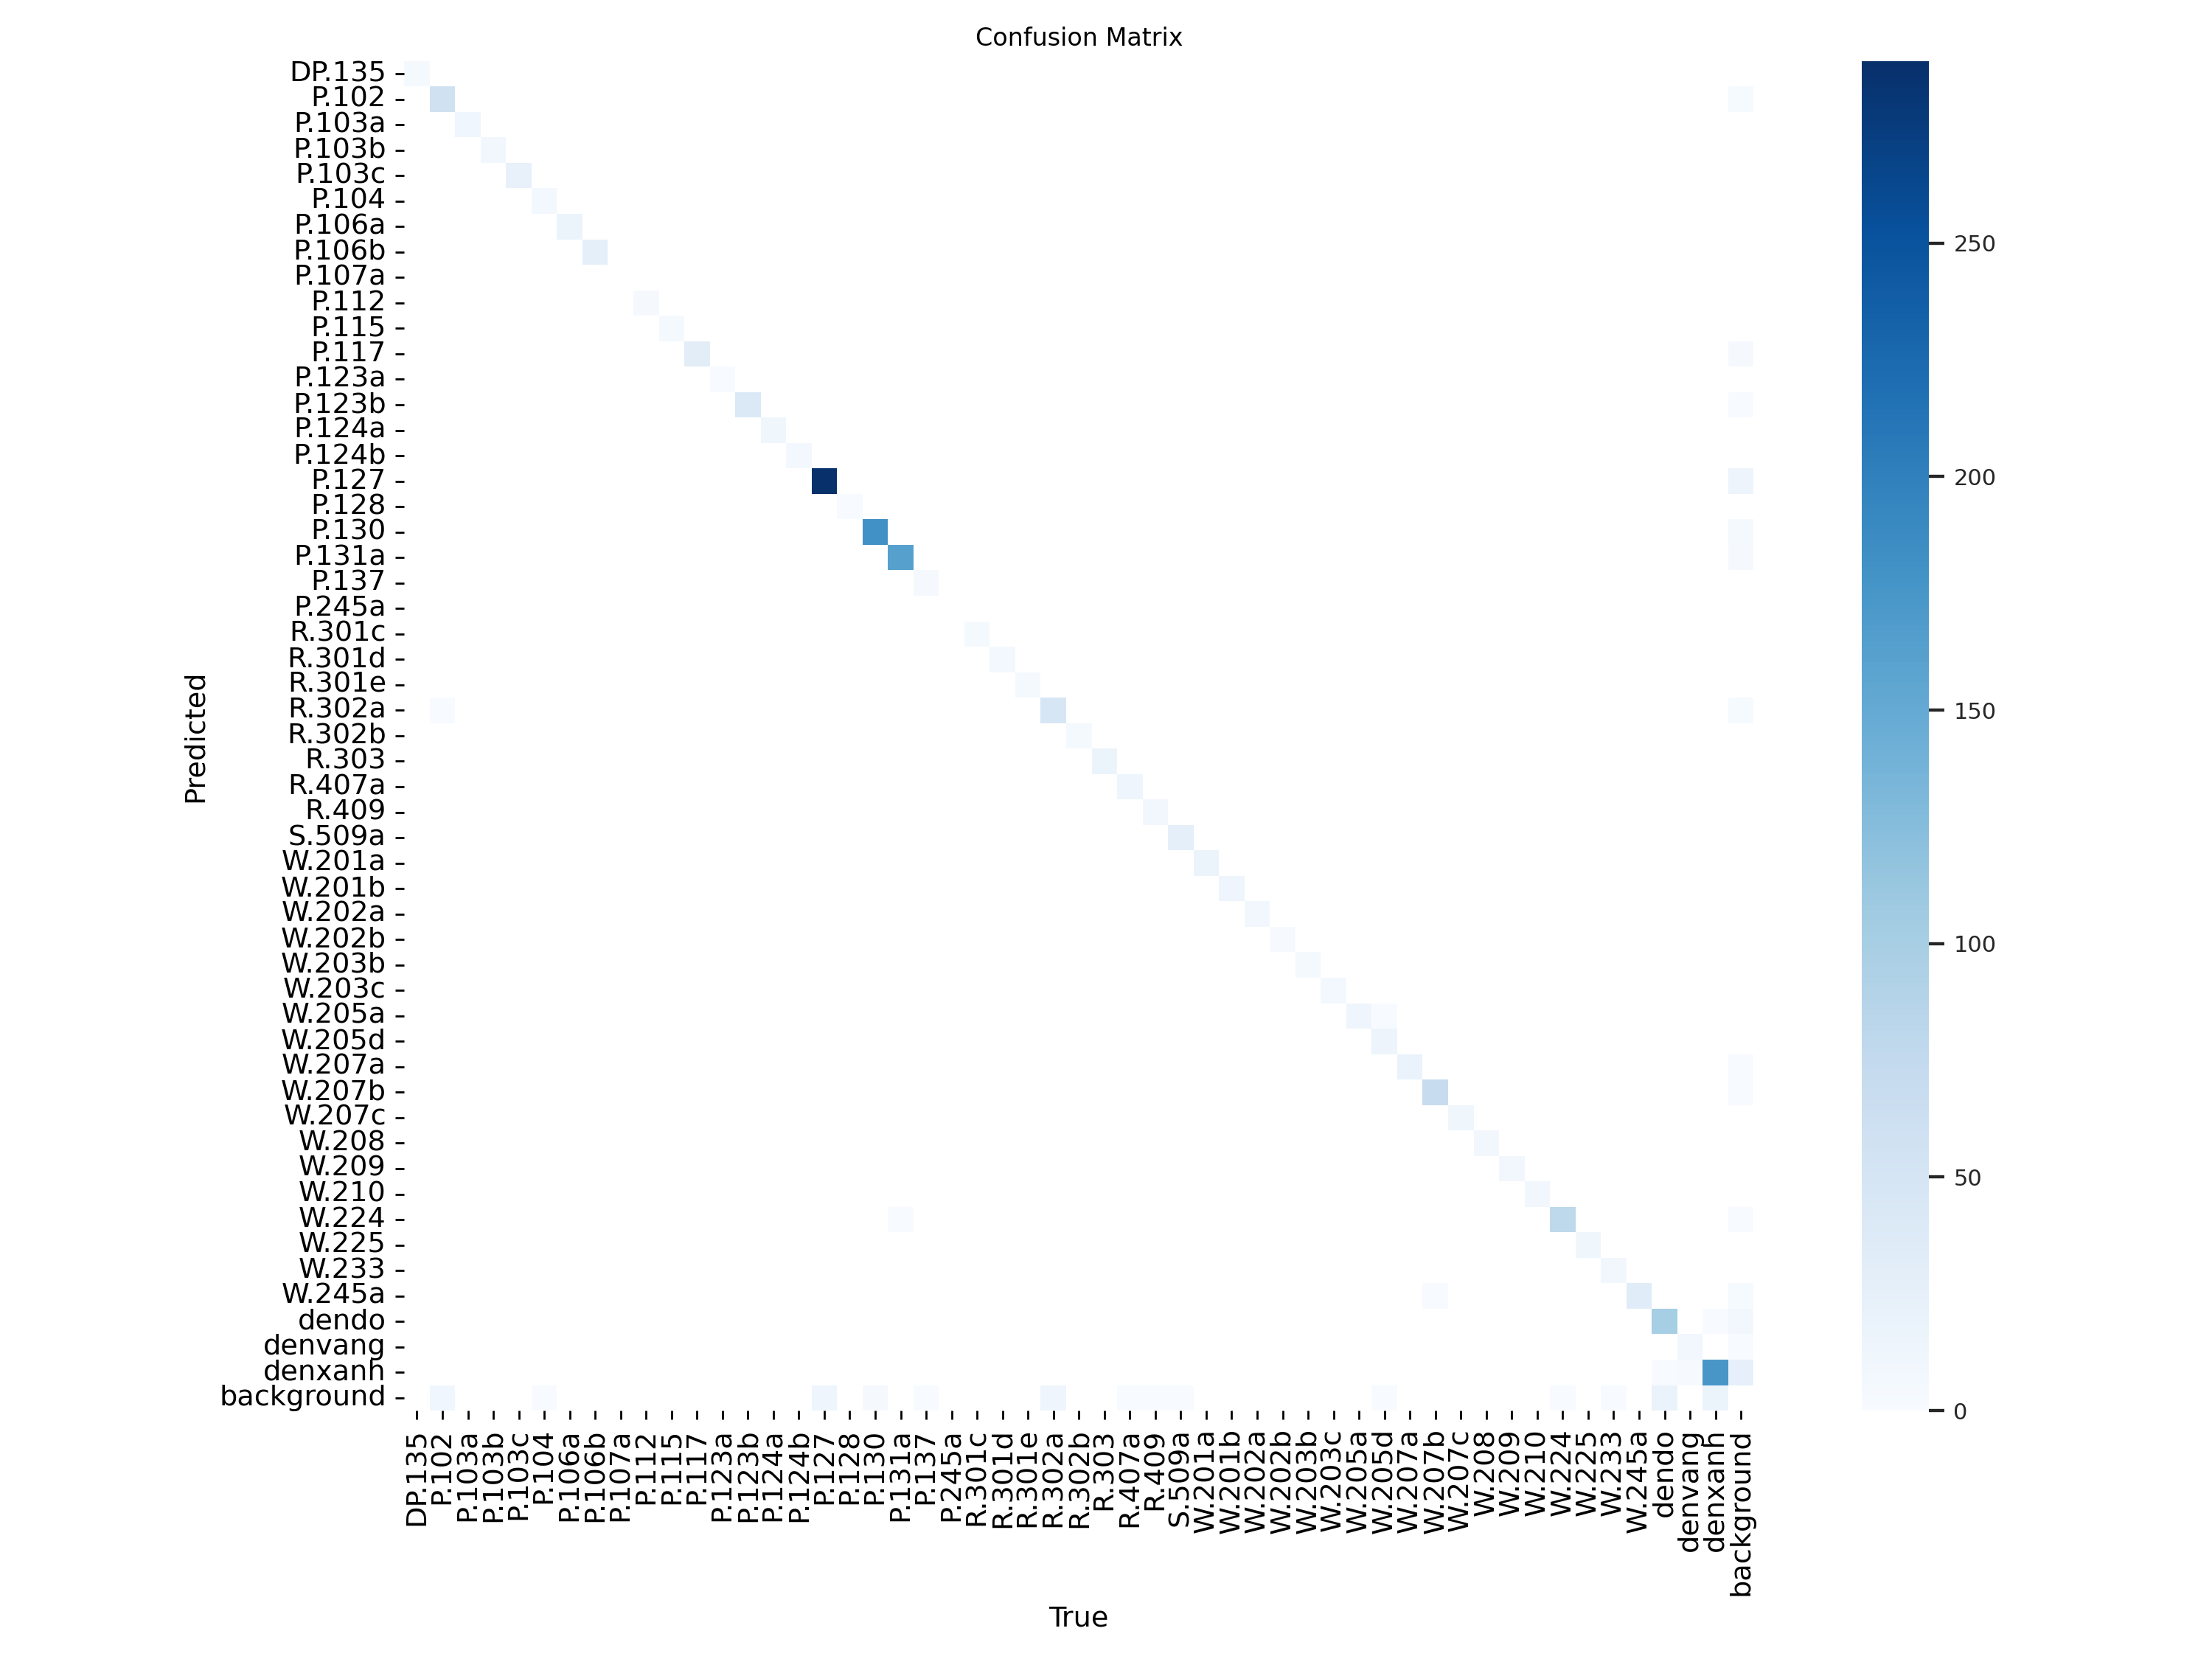

In [ ]:
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=600)

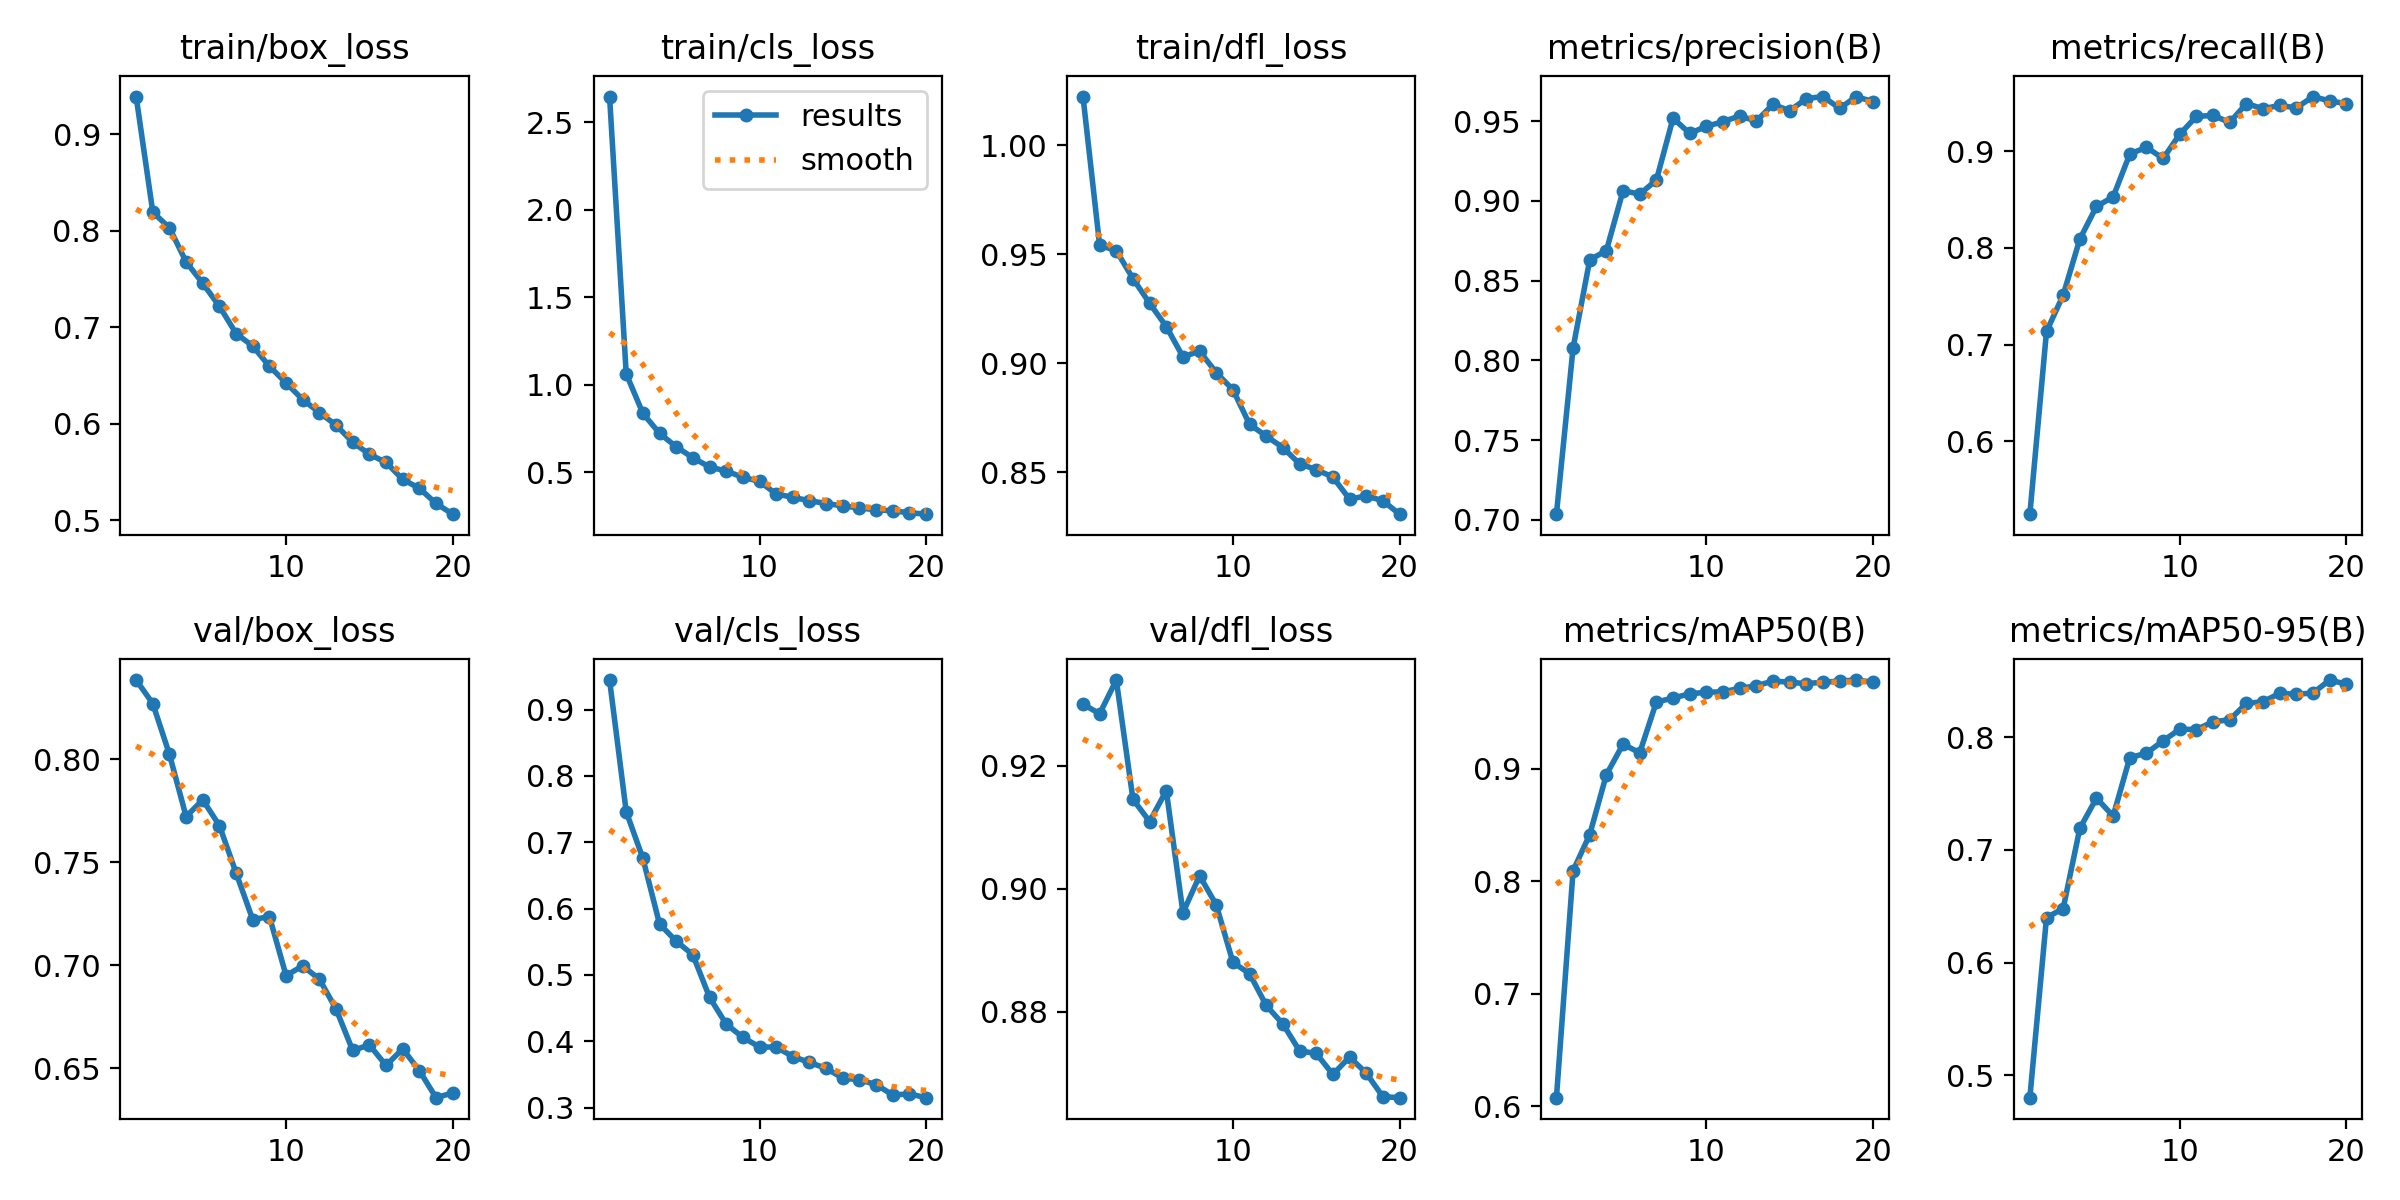

In [ ]:
Image(filename=f'/content/runs/detect/train2/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25869868 parameters, 0 gradients, 78.9 GFLOPs
val: Scanning /content/datasets/VietnamTrafficSign-5/valid/labels.cache... 908 images, 1 backgrounds, 0 corrupt: 100% 908/908 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 57/57 [00:25<00:00,  2.21it/s]
                   all        908       1748      0.965      0.952      0.979      0.851
                DP.135        908          5      0.937          1      0.995        0.9
                 P.102        908         69          1      0.786      0.902      0.711
                P.103a        908         11      0.976          1      0.995      0.805
                P.103b        908          9      0.965          1      0.995      0.995
                P.103c        908         22      0.986          1      0.995      0.948
                 P.104      

In [2]:
!yolo task=detect mode=predict model=Yolov8/best.pt conf=0.5 source='video.mp4'

Ultralytics YOLOv8.0.209  Python-3.11.6 torch-2.1.1+cpu CPU (Intel Core(TM) i5-3210M 2.50GHz)
Model summary (fused): 218 layers, 25869868 parameters, 0 gradients, 78.9 GFLOPs

video 1/1 (1/988) d:\Workspace\Computer_Vision\Project_CV\video.mp4: 352x640 (no detections), 2971.1ms
video 1/1 (2/988) d:\Workspace\Computer_Vision\Project_CV\video.mp4: 352x640 (no detections), 2177.6ms
video 1/1 (3/988) d:\Workspace\Computer_Vision\Project_CV\video.mp4: 352x640 (no detections), 2087.4ms
video 1/1 (4/988) d:\Workspace\Computer_Vision\Project_CV\video.mp4: 352x640 (no detections), 2194.9ms
video 1/1 (5/988) d:\Workspace\Computer_Vision\Project_CV\video.mp4: 352x640 (no detections), 2157.8ms
video 1/1 (6/988) d:\Workspace\Computer_Vision\Project_CV\video.mp4: 352x640 (no detections), 2226.8ms
video 1/1 (7/988) d:\Workspace\Computer_Vision\Project_CV\video.mp4: 352x640 (no detections), 2473.8ms
video 1/1 (8/988) d:\Workspace\Computer_Vision\Project_CV\video.mp4: 352x640 (no detections), 2110.2ms


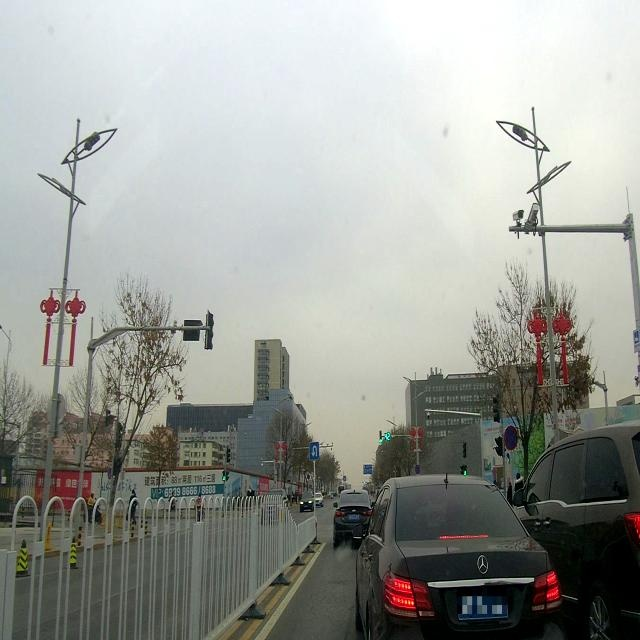

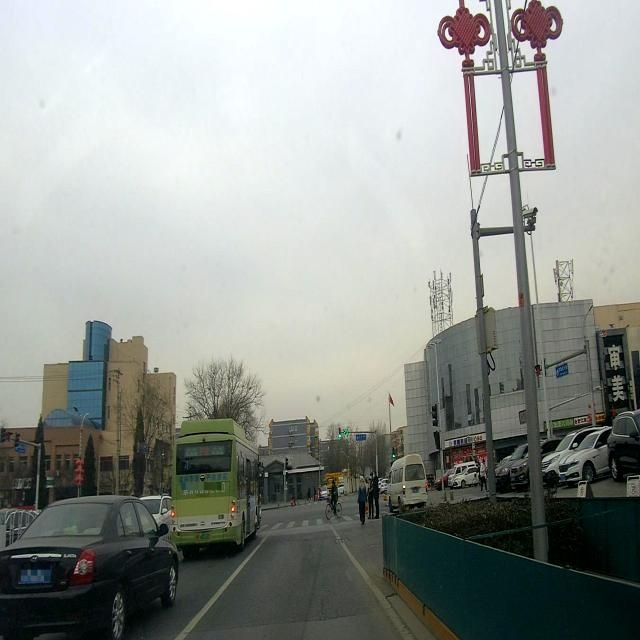

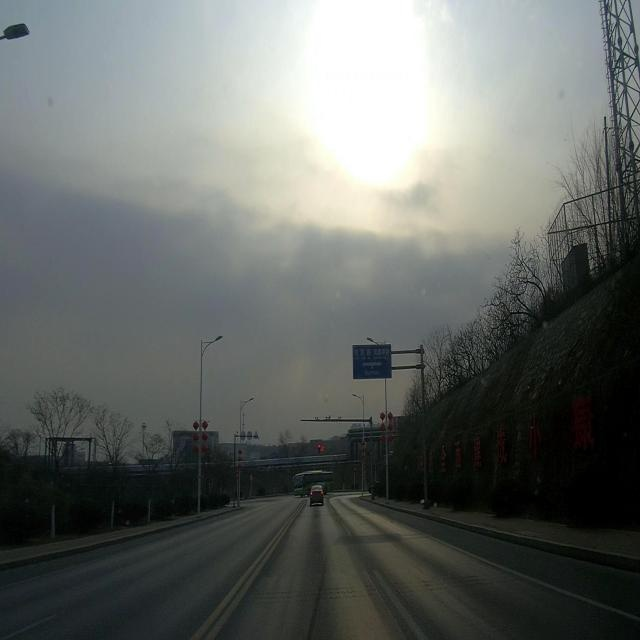

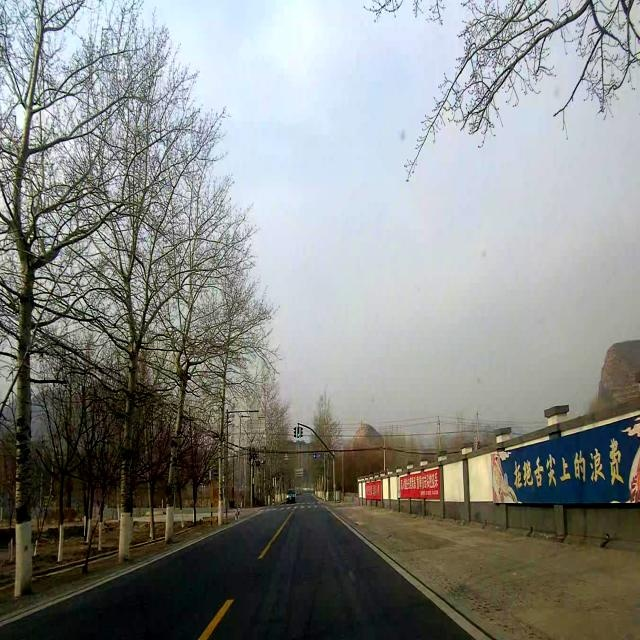

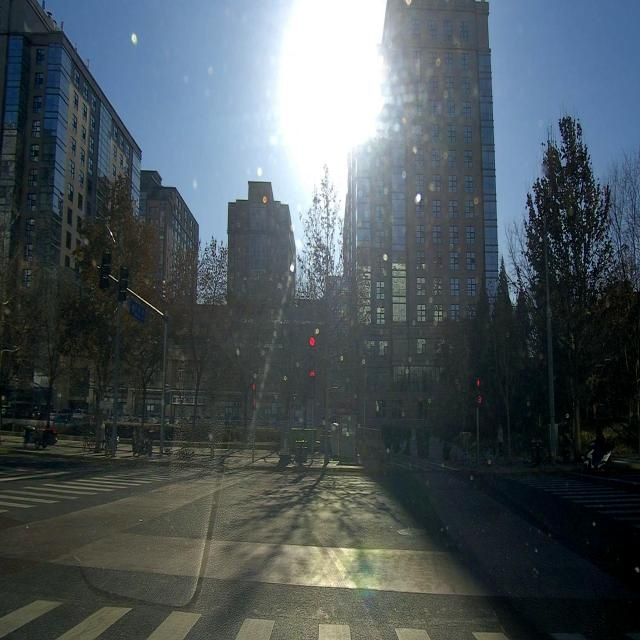

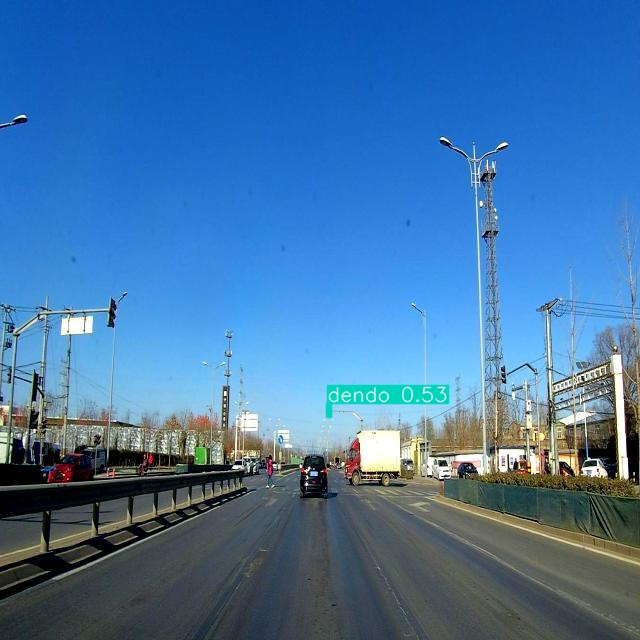

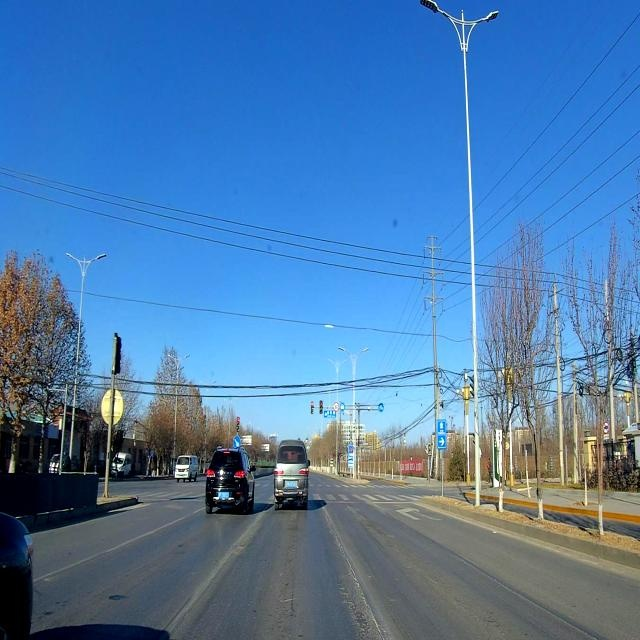

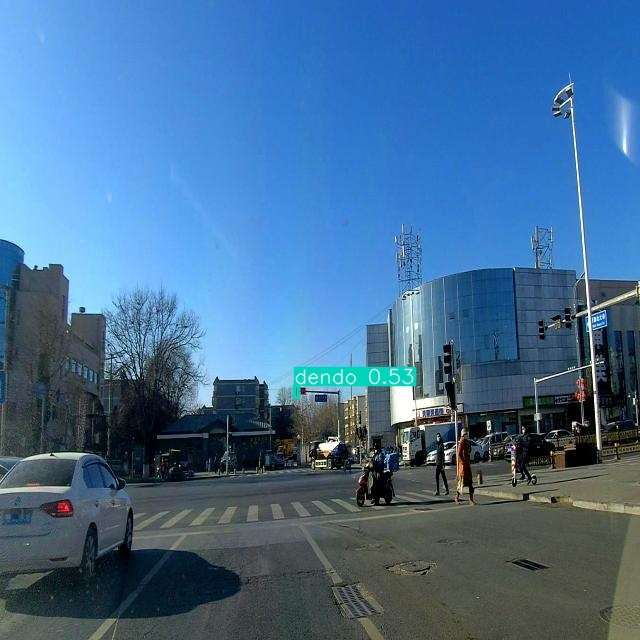

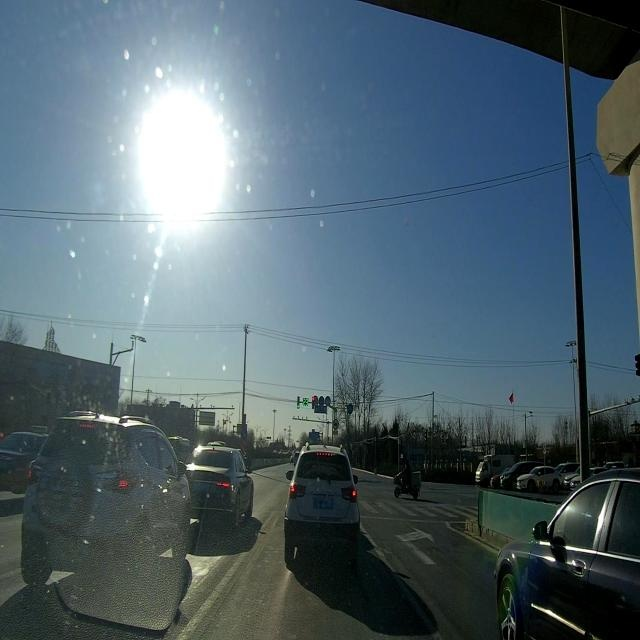

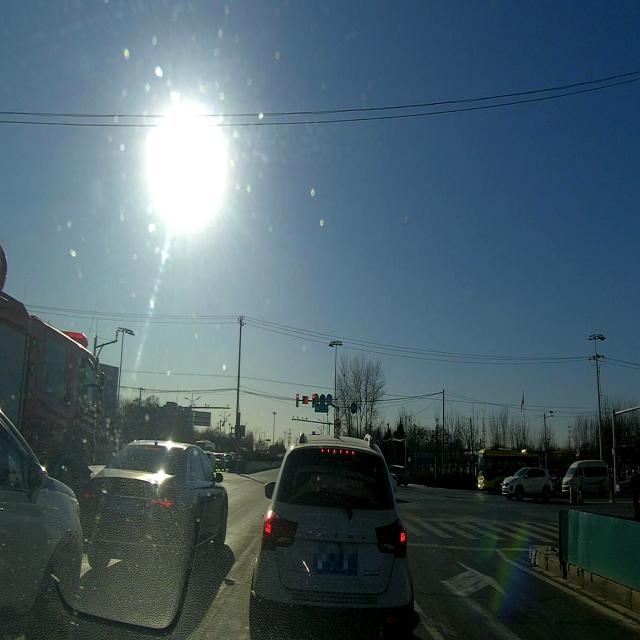

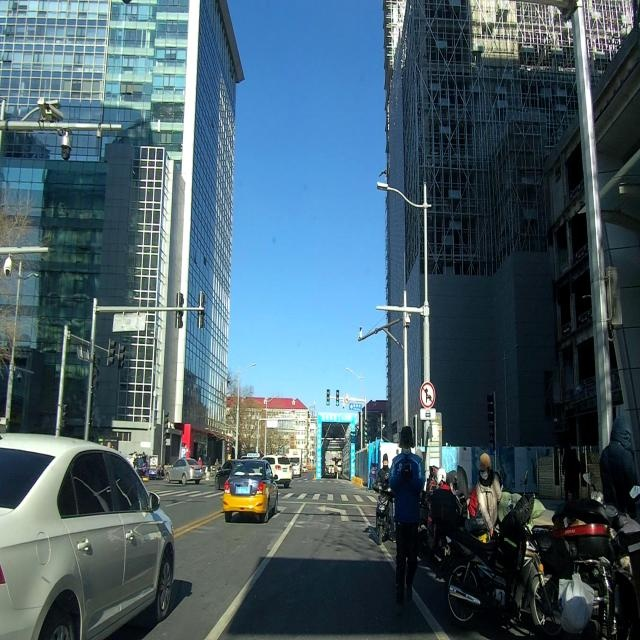

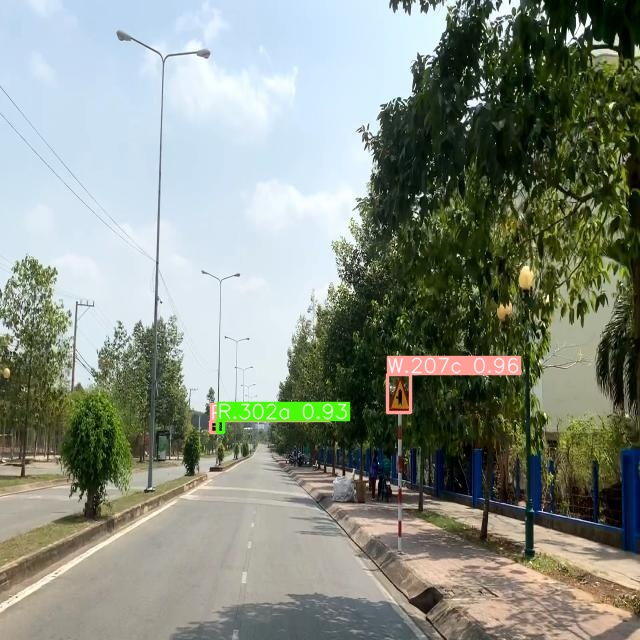

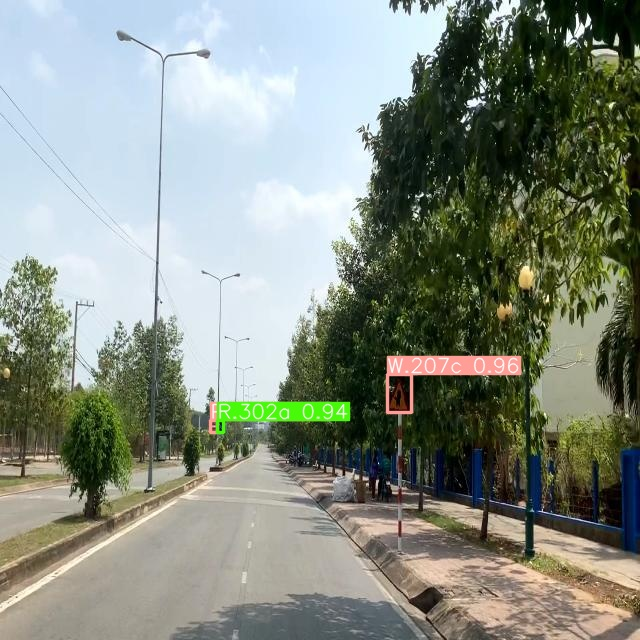

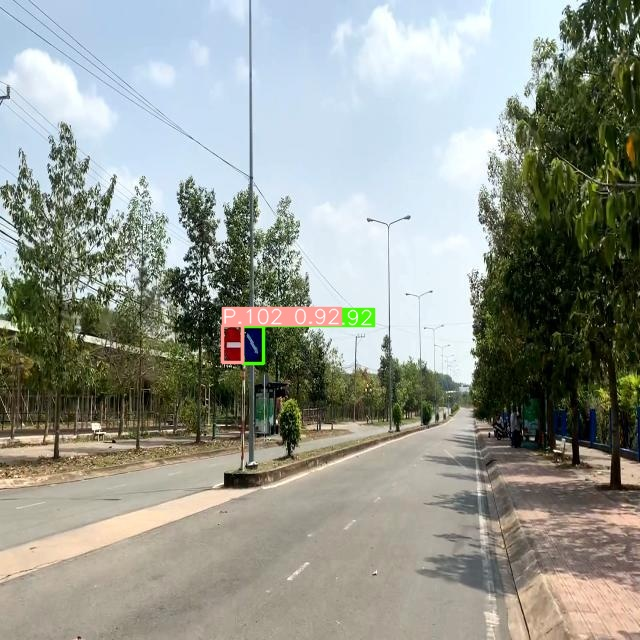

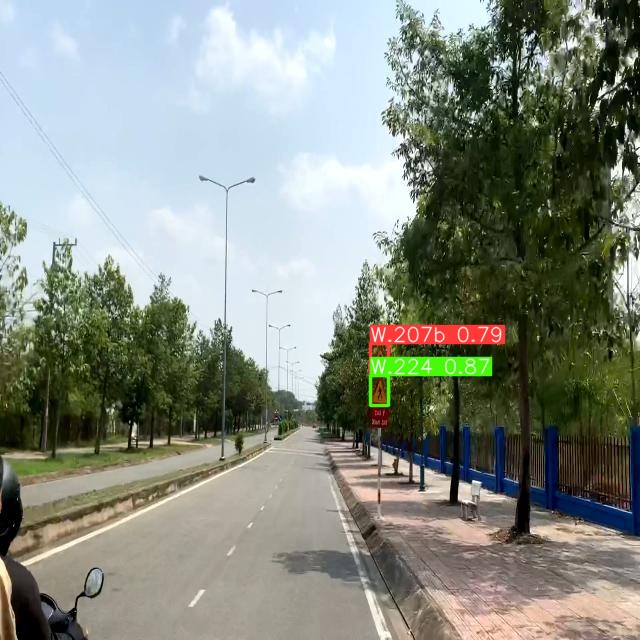

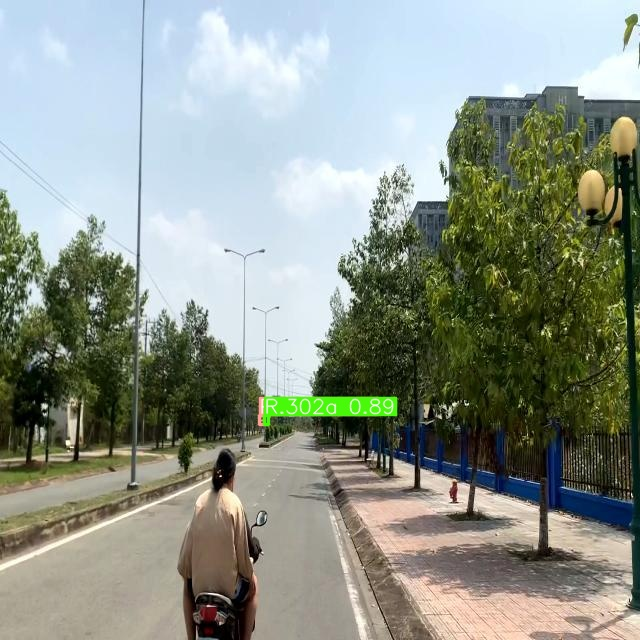

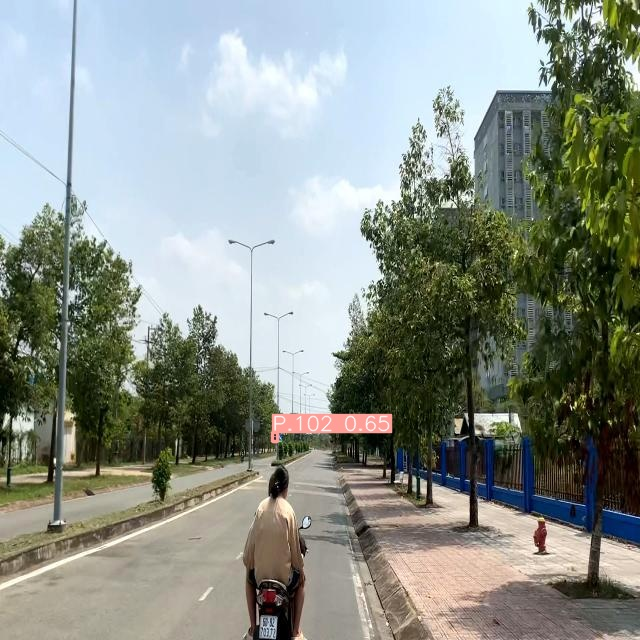

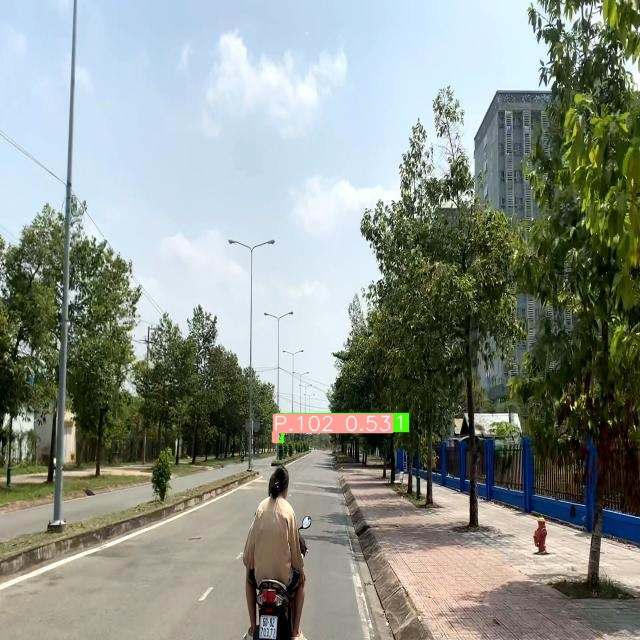

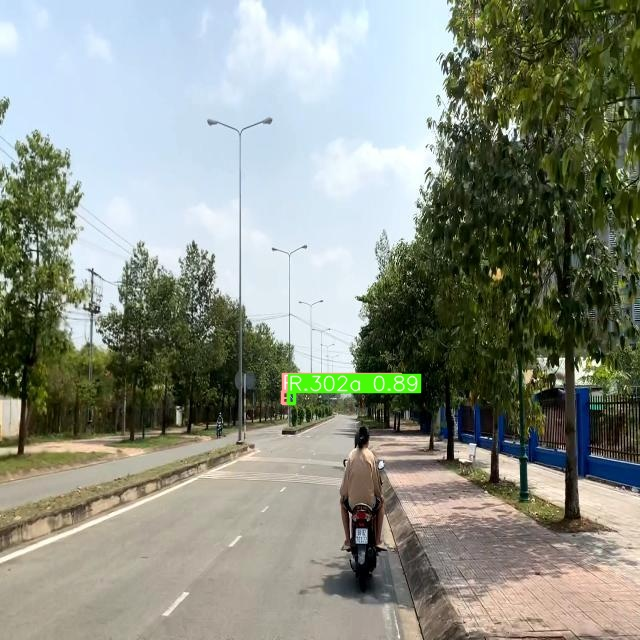

In [5]:
import glob
from IPython.display import Image, display
i = 0
for image_path in glob.glob(f'runs/detect/predict/*.jpg'):
  i += 1
  if i < 20:
    display(Image(filename=image_path, height=600))
    print("\n")